In [ ]:
import cv2
import os

raw_data_directory = '/content/drive/MyDrive/rawdata/'

images = []
for filename in os.listdir(raw_data_directory):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(raw_data_directory, filename)
        img = cv2.imread(img_path)
        images.append(img)


In [ ]:
len(images)

462

Epoch 1/10
12/12 [==============================] - 2s 102ms/step - loss: 0.0761 - val_loss: 0.0584
Epoch 2/10
12/12 [==============================] - 1s 67ms/step - loss: 0.0562 - val_loss: 0.0355
Epoch 3/10
12/12 [==============================] - 1s 66ms/step - loss: 0.0332 - val_loss: 0.0194
Epoch 4/10
12/12 [==============================] - 1s 68ms/step - loss: 0.0182 - val_loss: 0.0131
Epoch 5/10
12/12 [==============================] - 1s 66ms/step - loss: 0.0119 - val_loss: 0.0087
Epoch 6/10
12/12 [==============================] - 1s 67ms/step - loss: 0.0093 - val_loss: 0.0075
Epoch 7/10
12/12 [==============================] - 1s 68ms/step - loss: 0.0077 - val_loss: 0.0064
Epoch 8/10
12/12 [==============================] - 1s 67ms/step - loss: 0.0068 - val_loss: 0.0058
Epoch 9/10
12/12 [==============================] - 1s 67ms/step - loss: 0.0063 - val_loss: 0.0056
Epoch 10/10
12/12 [==============================] - 1s 68ms/step - loss: 0.0059 - val_loss: 0.0053


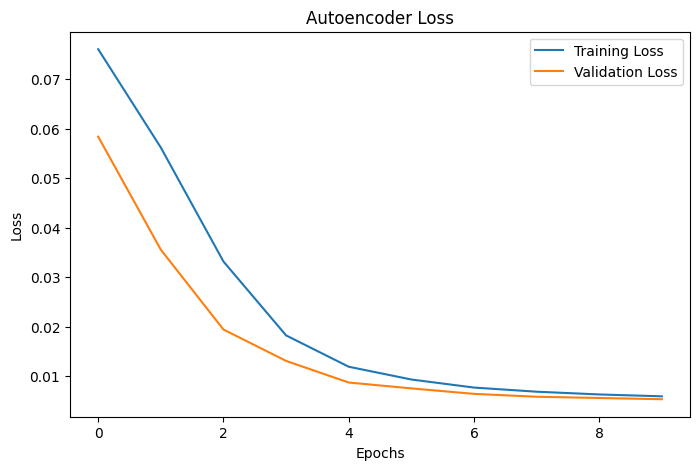

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os

raw_data_directory ='/content/drive/MyDrive/rawdata/'

image_files = [os.path.join(raw_data_directory, filename) for filename in os.listdir(raw_data_directory) if filename.endswith(('.jpg', '.png', '.jpeg'))]

images = []

for image_path in image_files:
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    images.append(img)

image_data = np.array(images)

input_shape = (224, 224, 3)

input_layer = Input(shape=input_shape)
encoder = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)
decoder = Conv2D(32, (3, 3), activation='relu', padding='same')(encoder)
decoder = UpSampling2D((2, 2))(decoder)
output_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(image_data, image_data, epochs=10, batch_size=32, shuffle=True, validation_split=0.2)

history = autoencoder.history

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

raw_data_directory = '/content/drive/MyDrive/rawdata/'

# Get a list of all image files in the directory
image_files = [os.path.join(raw_data_directory, filename) for filename in os.listdir(raw_data_directory) if filename.endswith(('.jpg', '.png', '.jpeg'))]

# Initialize empty lists to store the images and labels
images = []
labels = []

# Loop through all image files in the directory and load them
for image_path in image_files:
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0  # Normalize pixel values to [0, 1]
    images.append(img)

    label = image_path.split('/')[-1].split('.')[0]
    labels.append(label)

image_data = np.array(images)
labels = np.array(labels)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(image_data, labels_encoded, test_size=0.2, random_state=42)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))  # Number of output classes

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy for label encoding
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/20
12/12 [==============================] - 9s 434ms/step - loss: 6.2749 - accuracy: 0.0000e+00 - val_loss: 6.1411 - val_accuracy: 0.0108
Epoch 2/20
12/12 [==============================] - 5s 397ms/step - loss: 6.1393 - accuracy: 0.0027 - val_loss: 6.1539 - val_accuracy: 0.0000e+00
Epoch 3/20
12/12 [==============================] - 5s 402ms/step - loss: 6.1420 - accuracy: 0.0000e+00 - val_loss: 6.1508 - val_accuracy: 0.0000e+00
Epoch 4/20
12/12 [==============================] - 5s 393ms/step - loss: 6.1319 - accuracy: 0.0027 - val_loss: 6.1544 - val_accuracy: 0.0000e+00
Epoch 5/20
12/12 [==============================] - 5s 395ms/step - loss: 6.1307 - accuracy: 0.0027 - val_loss: 6.1598 - val_accuracy: 0.0000e+00
Epoch 6/20
12/12 [==============================] - 5s 398ms/step - loss: 6.1294 - accuracy: 0.0000e+00 - val_loss: 6.1653 - val_accuracy: 0.0000e+00
Epoch 7/20
12/12 [==============================] - 5s 399ms/step - loss: 6.1278 - accuracy: 0.0054 - val_loss: 6.17